In [91]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import math
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score

In [76]:
turistas = pd.read_csv('df_variaciones.csv')
turistas = turistas.rename(columns={'periodo': 'Fecha'})
turistas['Fecha'] = pd.to_datetime(turistas['Fecha'])
turistas.set_index('Fecha', inplace=True)
turistas = turistas['Turistas_var']
train = turistas[:'2019-02-01']
test = turistas['2019-03-01':]

In [11]:
turistas = pd.read_csv('turistas_simple.csv')
turistas['Fecha'] = pd.to_datetime(turistas['Fecha'])
turistas.set_index('Fecha', inplace=True)
train = turistas[:'2019-02-01']
test = turistas['2019-03-01':]

In [127]:
turistas

,Turistas
Fecha,
2012-01-01,88318.57205
2012-02-01,59186.46835
2012-03-01,59478.95959
2012-04-01,70629.60541
2012-05-01,67893.16757
...,...
2019-10-01,67129.00000
2019-11-01,64563.00000
2019-12-01,68464.00000


In [37]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(turistas)

(0.01, False)

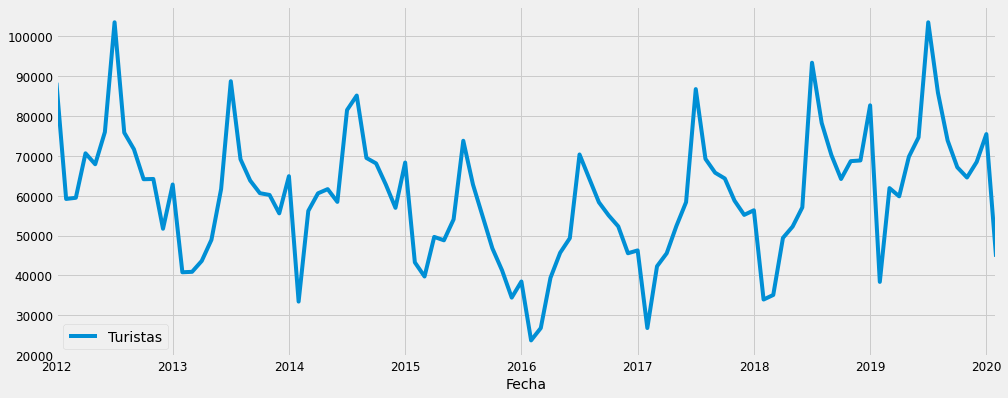

In [7]:
turistas.plot(figsize=(15, 6))
plt.show()

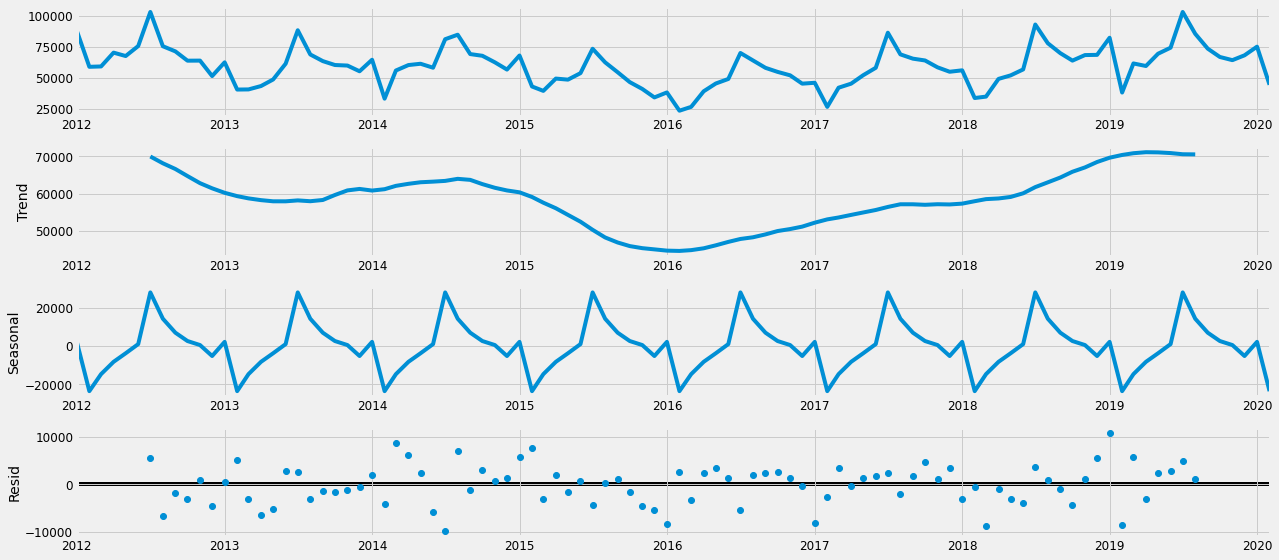

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(turistas, model='additive' )
fig = decomposition.plot()
plt.show()

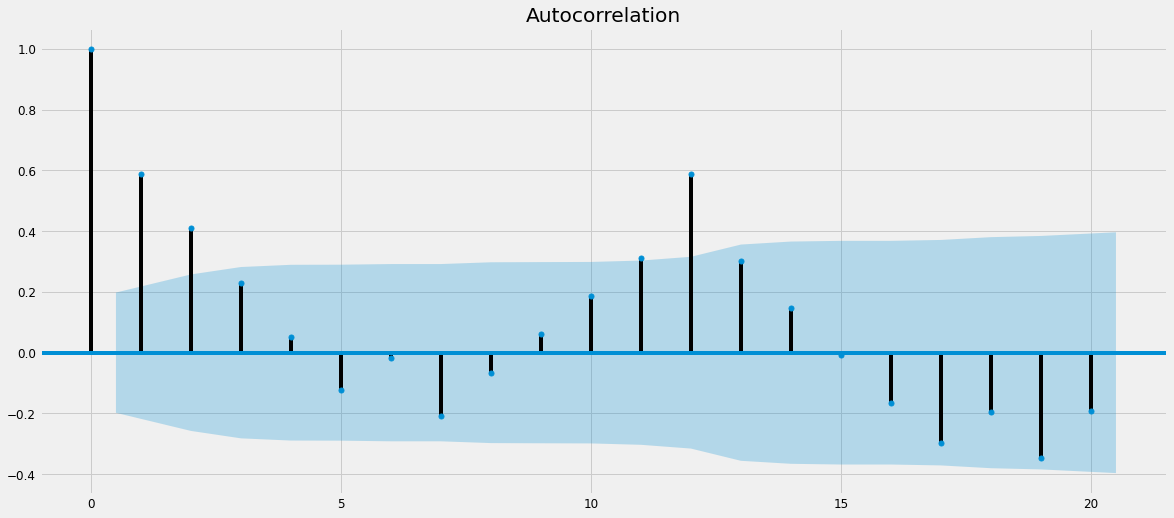

In [125]:
sm.graphics.tsa.plot_acf(turistas)
plt.show()

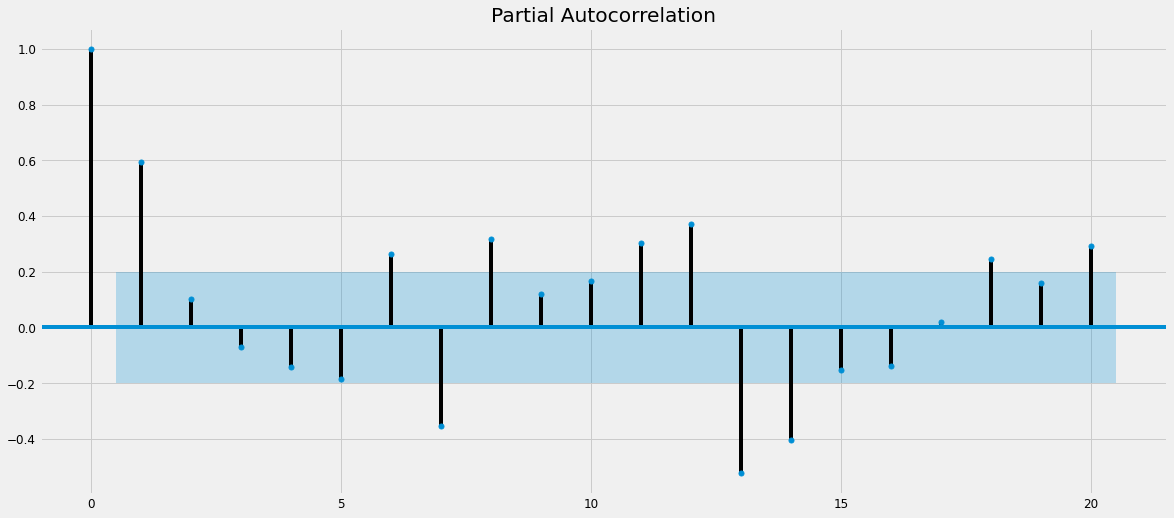

In [126]:
sm.graphics.tsa.plot_pacf(turistas)
plt.show()

In [110]:
stepwise_model = auto_arima(train, start_p=0, start_q=0, d= 1,
                           max_p=5, max_q=5, max_d = 5, m=12,
                           start_P=0, start_Q = 0, max_P = 5, 
                           max_D = 5, max_Q = 5, seasonal=True,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1866.331, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1828.942, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1838.466, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1864.489, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1860.347, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1828.280, Time=0.27 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=1827.911, Time=0.47 sec
 ARIMA(1,1,0)(4,0,0)[12] intercept   : AIC=1829.345, Time=0.99 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=1828.699, Time=1.43 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1826.926, Time=0.46 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1824.976, Time=0.16 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1838.261, Time=0.10 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1826.886, Time=0.45 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1835.634, Time=0.19 sec
 ARIMA(1,1,0)(2,0,2

In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
best_aic = 3000
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal

/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py

In [111]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=stepwise_model.order,
                                seasonal_order=stepwise_model.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             Turistas   No. Observations:                   86
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -746.216
Date:                              Sun, 18 Oct 2020   AIC                           1498.432
Time:                                      11:32:29   BIC                           1505.262
Sample:                                  01-01-2012   HQIC                          1501.151
                                       - 02-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9808      0.039     24.905      0.000       0.904       1.058
ma.S.L12      -0.38

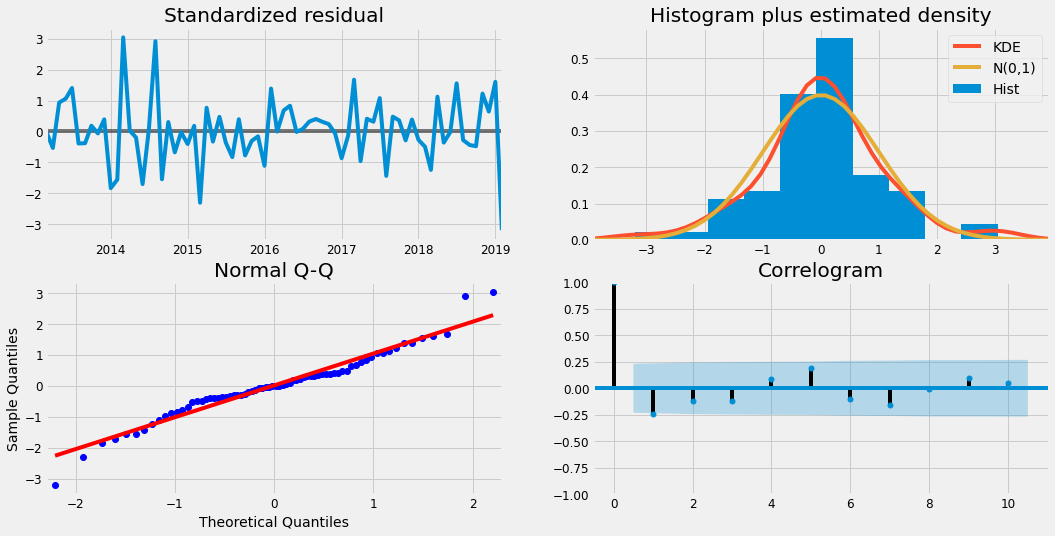

In [112]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

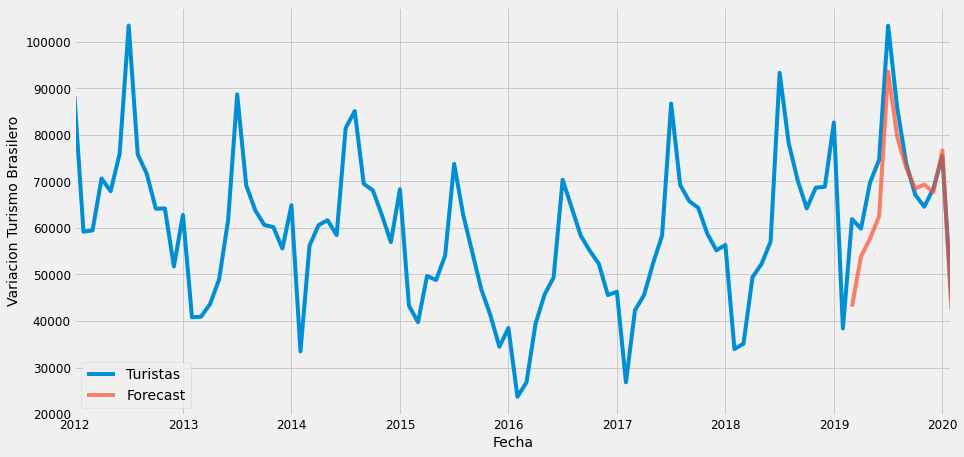

In [113]:
pred = results.forecast(steps = 12)
pred_ci = results.get_forecast(steps = 12).summary_frame()[['mean_ci_lower', 'mean_ci_upper']]
ax = turistas['2012':].plot(label='Observedo')
pred.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Fecha')
ax.set_ylabel('Variacion Turismo Brasilero')
plt.legend()
plt.show()

In [102]:
mse = mean_squared_error(test, pred)
print('The Mean Squared Error of our forecasts is {}'.format(round(math.sqrt(mse), 5)))

The Mean Squared Error of our forecasts is 8424.13941


In [103]:
r2_score(test,pred)

0.6265998478892476

In [120]:
pred

2019-03-01    43075.469220
2019-04-01    53888.656511
2019-05-01    57713.442326
2019-06-01    62491.992622
2019-07-01    93617.694188
2019-08-01    79597.030793
2019-09-01    72972.632865
2019-10-01    68450.606452
2019-11-01    69332.844637
2019-12-01    67663.113896
2020-01-01    76631.239398
2020-02-01    42355.901266
Freq: MS, dtype: float64